In [24]:
import torch
import numpy as np
import pandas as pd
import torchvision
import matplotlib.pyplot as plt
import sys
sys.path.append("..")
from Procrustes import ProcrustesDistance

In [25]:
n = 16
t = 32
M = torch.randn(n, t)

In [41]:
N = torch.zeros(n, t, requires_grad=True)
# Make N look like M
def train(N, M, epochs=750):
    optimizer = torch.optim.Adam([N], lr=1e-2)
    metric = ProcrustesDistance()

    for i in range(epochs):
        optimizer.zero_grad()
        loss = metric(N, M)
        loss.backward()
        optimizer.step()
        if i % 50 == 0:
            print(f"Procrustes Distance: {loss.item():.4f}")
            plt.figure(figsize=(6, 6))
            plt.scatter(M[0, :], M[1, :], s=1, label='Chaos', color='blue')
            plt.scatter(N.detach()[0, :], N.detach()[1, :], s=1, label='Trained Neurons', color='red')
            plt.title("Chaos vs Trained Matrix")
            plt.xlabel("X")
            plt.ylabel("Y")
            plt.axis('equal')
            plt.legend()
            plt.show()
    print(f"Final Procrustes Distance between A and B: {metric(N, M).item():.4f}")

In [42]:
chaos = torch.tensor(pd.read_csv("chaos_cursive.csv", header=None).to_numpy(), dtype=torch.float32)
print(f"Chaos shape: {chaos.shape}")

Chaos shape: torch.Size([2, 1322])


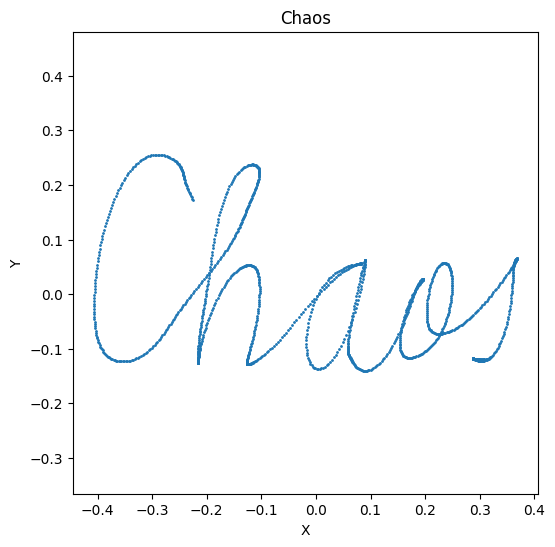

In [43]:
# Display the word
def visualize(word, title):
    plt.figure(figsize=(6, 6))
    plt.scatter(word[0, :], word[1, :], s=1)
    plt.title(title)
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.axis('equal')
    plt.show()
visualize(chaos, "Chaos")

/var/folders/8v/z7_lynrn24bbpwy6p36j3cwc0000gn/T/ipykernel_57331/3303043714.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train(neurons, torch.tensor(chaos, dtype=torch.float32), epochs=200)


Procrustes Distance: 0.4021


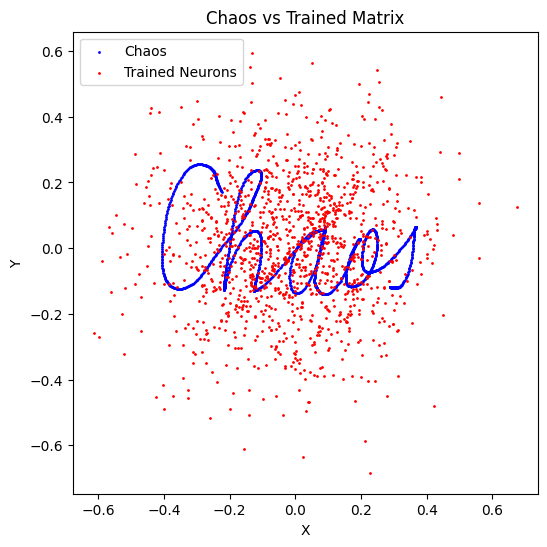

Procrustes Distance: 0.0069


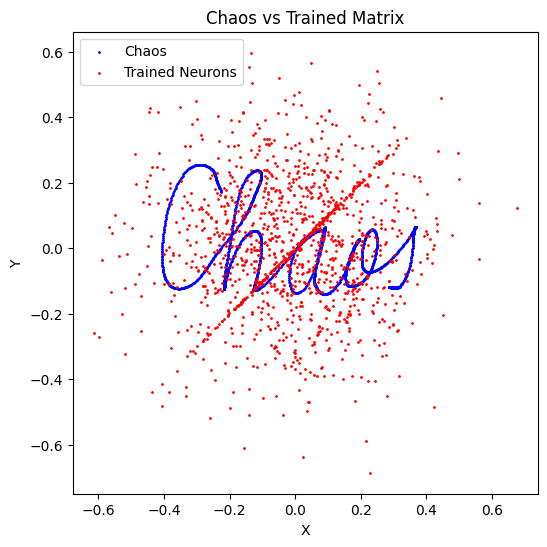

Procrustes Distance: 0.0376


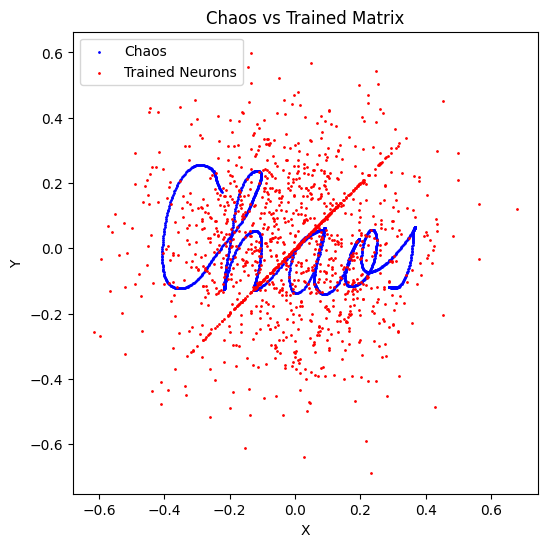

Procrustes Distance: 0.0236


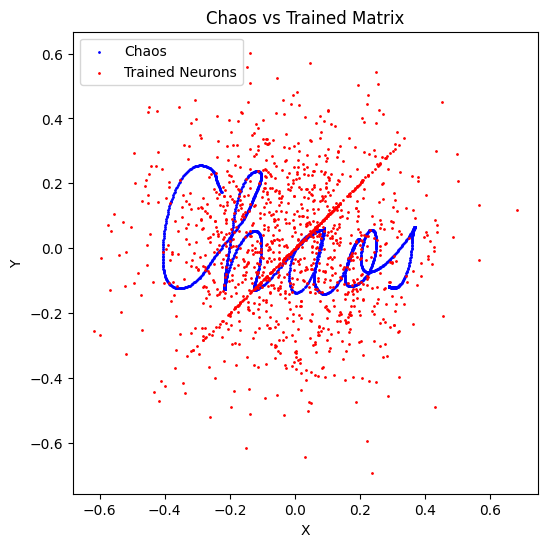

Final Procrustes Distance between A and B: 0.1096


In [44]:
neurons = torch.normal(mean=0, std=0.2, size=(2, 1322), requires_grad=True)
train(neurons, torch.tensor(chaos, dtype=torch.float32), epochs=200)

Trained Neurons shape: torch.Size([2, 1322])
Chaos shape: torch.Size([2, 1322])


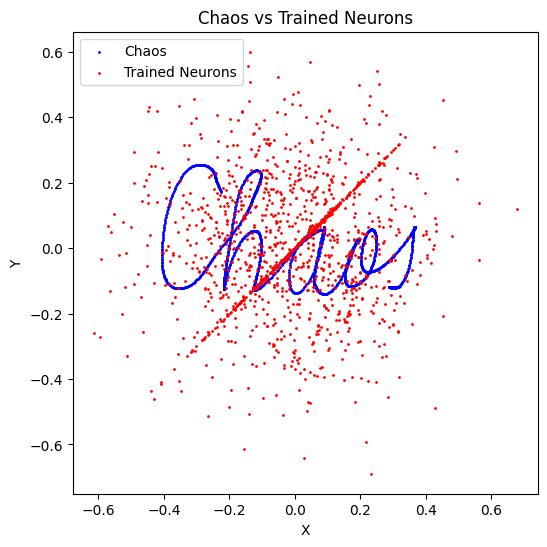

In [45]:
trained = neurons.detach()
print(f"Trained Neurons shape: {trained.shape}")
print(f"Chaos shape: {chaos.shape}")
# Visualize both on the same graph
plt.figure(figsize=(6, 6))
plt.scatter(chaos[0, :], chaos[1, :], s=1, label='Chaos', color='blue')
plt.scatter(trained[0, :], trained[1, :], s=1, label='Trained Neurons', color='red')
plt.title("Chaos vs Trained Neurons")
plt.xlabel("X")
plt.ylabel("Y")
plt.axis('equal')
plt.legend()
plt.show()